In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as clr


from tqdm.notebook import tqdm
import importlib
from scipy import stats 
matplotlib
import seqencoder

In [2]:
df = pd.read_csv('../figure_files/100k_dream.csv', sep = '\t')

In [3]:
given_expression = df.Target_expression
pred_score = df.Pred_expression

In [4]:
# given_expression = np.load('../figure_files/target_final_100000.npy')
# pred_score = np.load('../figure_files/pred_final_100000.npy')

In [5]:
font_scale = 1.3
sns.set(font_scale=font_scale, style="ticks", font="Lato")
matplotlib.rcParams['font.weight'] = "medium"
matplotlib.rcParams['font.size'] = 11 * font_scale
matplotlib.rcParams['axes.labelweight'] = 'medium'
matplotlib.rcParams['figure.titleweight'] = 'medium'
matplotlib.rcParams['axes.titleweight'] = 'medium'

findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
/home/fengrenxu/.conda/envs/diffusion_model/lib/python3.10/site-packages/seaborn/axisgrid.py:1886: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(self.x, **orient_kw_x, **kwargs)
/home/fengrenxu/.conda/envs/diffusion_model/lib/python3.10/site-packages/seabo

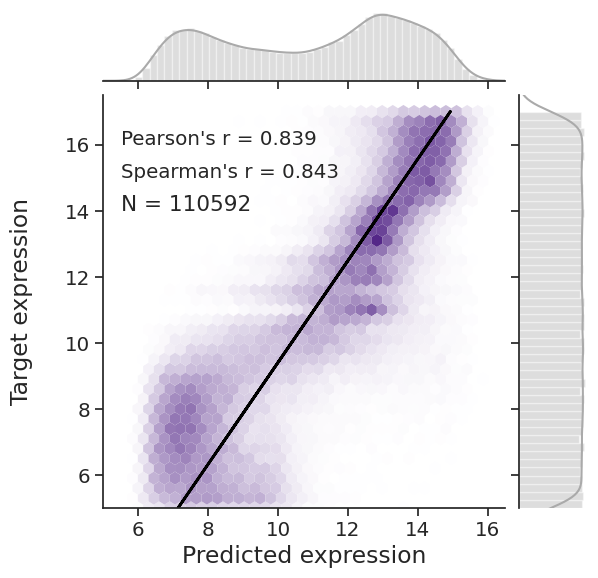

In [6]:
from matplotlib.colorbar import Colorbar
g_list = []

# x = given_expression
coeff = np.polyfit(given_expression, pred_score, 1)
coeff_auth = np.polyfit(given_expression, pred_score, 1)

poly1d_fn = np.poly1d(coeff) 
poly1d_fn_auth = np.poly1d(coeff_auth) 


our_corr = round(stats.spearmanr(given_expression, pred_score)[0], 3)
our_corr_sp = round(stats.pearsonr(given_expression, pred_score)[0], 3)

joint_kws=dict(gridsize=50, extent= (5, 18, 5, 18))
g = sns.JointGrid(x=pred_score, y=given_expression, ratio=5)
g.ax_joint.set_xlim(5, 16.5)
g.ax_joint.set_ylim(5, 17.5)
g.plot_marginals(sns.distplot, color="#AAAAAA")
cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#FFFFFF','#542788'], N=256)
g.plot_joint(plt.hexbin, gridsize=35, cmap=cmap, linewidths = (0,))
g.ax_joint.plot(poly1d_fn(given_expression), given_expression, '-', linewidth = 2, color="#000000")


g.ax_joint.set_xlabel('Predicted expression', size=13*font_scale)
g.ax_joint.set_ylabel('Target expression\n', size=13*font_scale)

g.ax_joint.text(5.5, 16, f"Pearson's r = {round(our_corr,3)}", size=11*font_scale)
g.ax_joint.text(5.5, 15, f"Spearman's r = {round(our_corr_sp,3)}", size=11*font_scale)
g.ax_joint.text(5.5, 14, f"N = {given_expression.shape[0]}", size=12*font_scale)
g.ax_joint.tick_params(axis='both', which='major', pad=3)
import matplotlib.ticker as plticker

loc = plticker.MultipleLocator(base=2.0) # this locator puts ticks at regular intervals
g.ax_joint.xaxis.set_major_locator(loc)

# g.ax_joint.autoscale()
# g.savefig(f'jointplot_dream.svg', dpi=300)
g_list.append(g)

findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


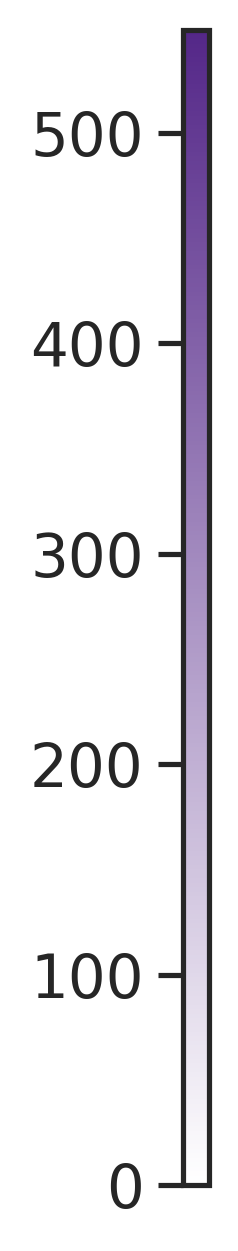

In [7]:
from matplotlib import gridspec
fig = plt.figure(figsize=(0.5,5), dpi=300)
gs = gridspec.GridSpec(1, 4, figure=fig, width_ratios=[1, 1, 1, 1], height_ratios=[1])
cbax = plt.subplot(gs[3])
cb = Colorbar(ax = cbax, mappable = g.ax_joint.collections[0], orientation = 'vertical', ticklocation = 'left')
# plt.savefig('jointplot_colorbar.svg')

plt.show()